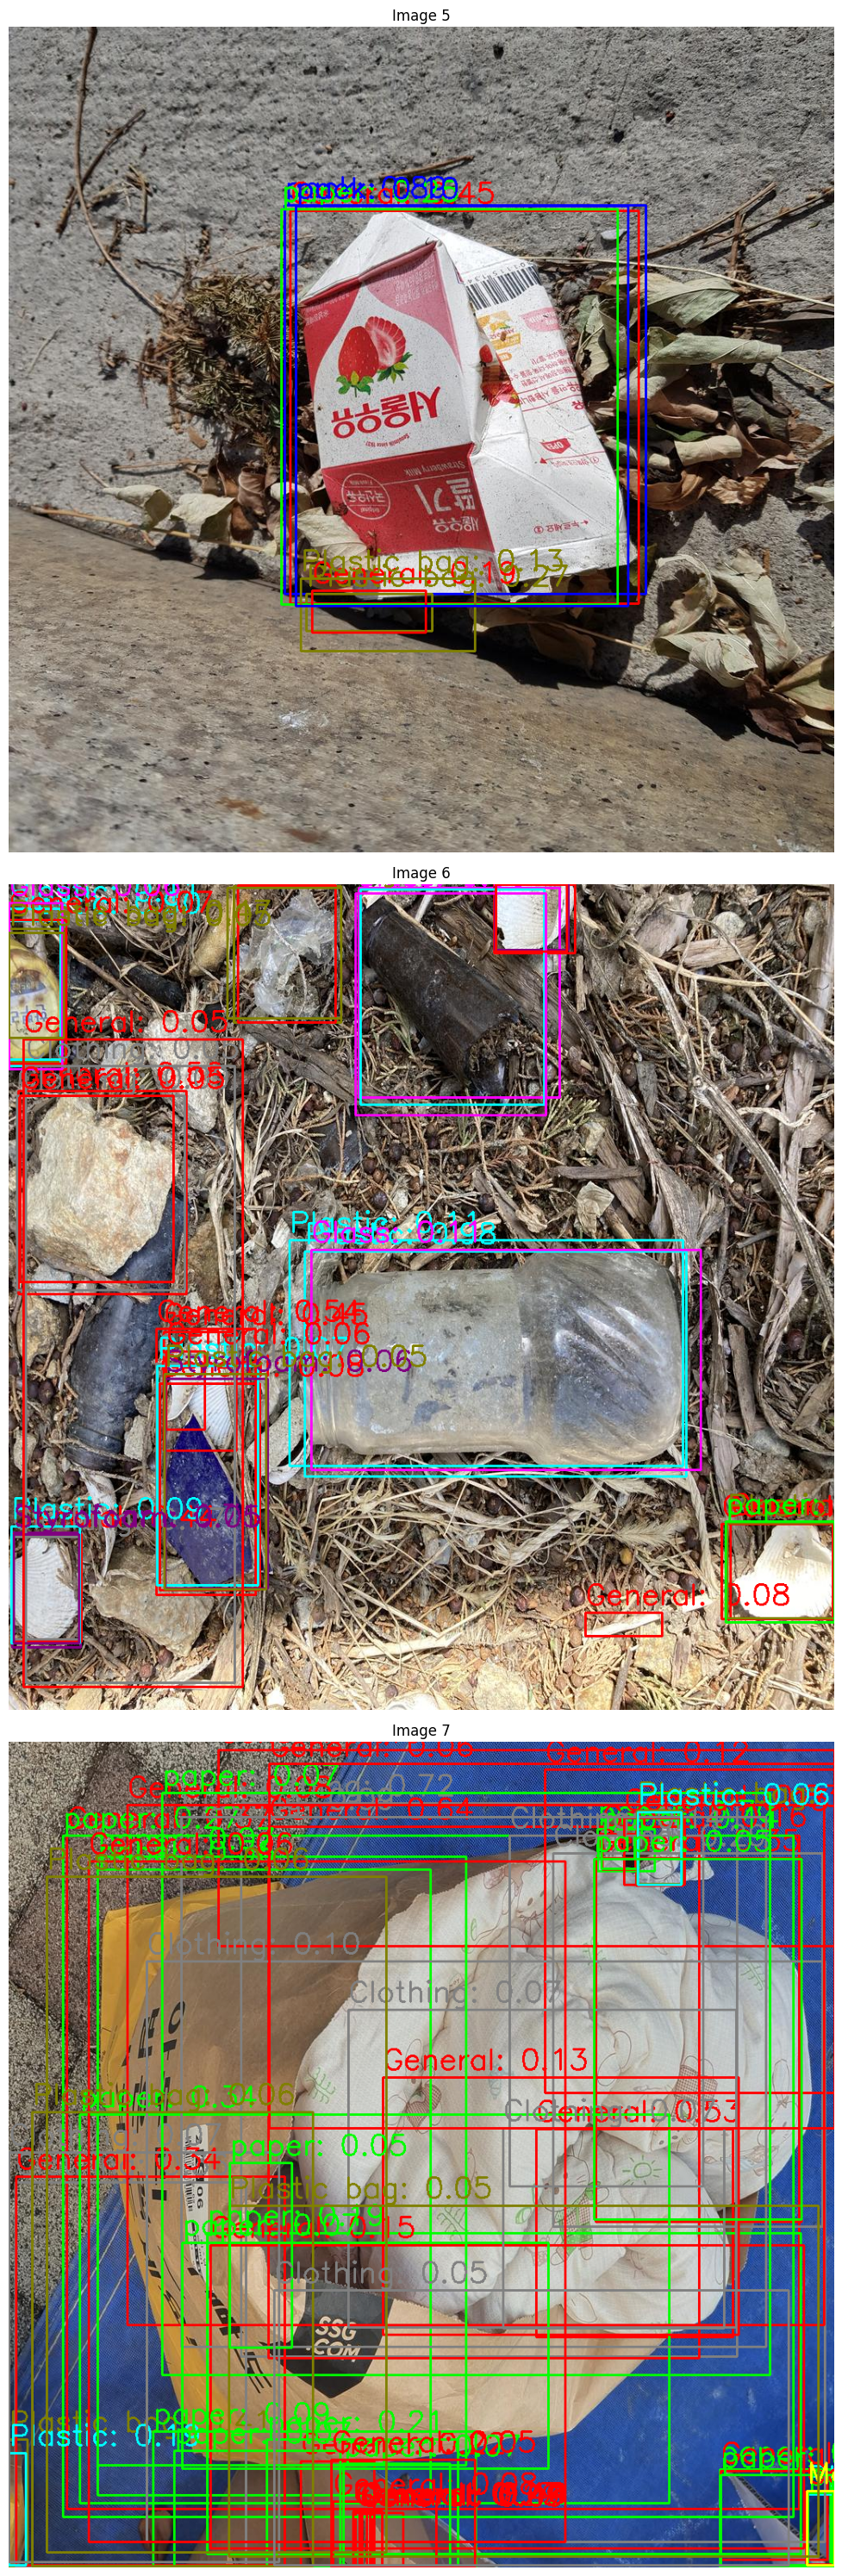

In [27]:
import cv2
import matplotlib.pyplot as plt
import random
import pandas as pd

# Load the CSV file
csv_file_path = '/data/ephemeral/home/working_CYD/level2-objectdetection-cv-08/mmdetection/work_dirs/jh_result/submission_faster_min_32_nms.csv'  # Replace with your file path
image_base_path = '/data/ephemeral/home/dataset/test'  # Replace with your image folder path

# Define some class names and colors for visualization
class_names = {0: 'General', 1: 'paper', 2: 'pack', 3: 'Metal', 4: 'Glass', 
               5: 'Plastic', 6: 'Styrofoam', 7: 'Plastic bag', 8: 'Battery', 9: 'Clothing'}

# Generate random distinct colors for each class
class_colors = {
    0: (255, 0, 0),    # Red
    1: (0, 255, 0),    # Green
    2: (0, 0, 255),    # Blue
    3: (255, 255, 0),  # Yellow
    4: (255, 0, 255),  # Magenta
    5: (0, 255, 255),  # Cyan
    6: (128, 0, 128),  # Purple
    7: (128, 128, 0),  # Olive
    8: (0, 128, 128),  # Teal
    9: (128, 128, 128) # Gray
}

# Function to parse the prediction string and extract bounding box information
def parse_prediction_string(pred_string):
    pred_data = pred_string.split()
    bbox_data = []
    for i in range(0, len(pred_data), 6):
        class_id = int(pred_data[i])
        score = float(pred_data[i+1])
        x_min = float(pred_data[i+2])
        y_min = float(pred_data[i+3])
        x_max = float(pred_data[i+4])
        y_max = float(pred_data[i+5])
        bbox_data.append((class_id, score, x_min, y_min, x_max, y_max))
    return bbox_data

# Function to visualize bounding boxes with class name and color
def visualize_bboxes_with_class(image_path, bboxes):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    for bbox in bboxes:
        class_id, score, x_min, y_min, x_max, y_max = bbox
        color = class_colors.get(class_id, (255, 0, 0))  # Use a default color if class is unknown
        
        # Draw rectangle and class label
        cv2.rectangle(image, (int(x_min), int(y_min)), (int(x_max), int(y_max)), color, 2)
        label = f"{class_names.get(class_id, 'Unknown')}: {score:.2f}"
        font_scale = 1.2  # Increase font size to 1.2
        thickness = 2      # Increase thickness for better visibility
        
        cv2.putText(image, label, (int(x_min), int(y_min) - 10),cv2.FONT_HERSHEY_SIMPLEX, font_scale, color, thickness)
    
    return image

# Function to display 3 images with bounding boxes starting from a given index
def display_images_batch(df, start_index, image_base_path):
    if start_index < 0 or start_index >= len(df):
        print(f"Start index {start_index} is out of bounds.")
        return
    
    end_index = min(start_index + 3, len(df))
    batch_df = df.iloc[start_index:end_index]
    
    # Set up a grid for 3 images
    fig, axes = plt.subplots(3, 1, figsize=(40, 30))
    
    for idx, row in enumerate(batch_df.itertuples()):
        image_path = f"{image_base_path}/{row.image_id.split('/')[-1]}"
        prediction_string = row.PredictionString
        
        # Parse bounding boxes
        bboxes = parse_prediction_string(prediction_string)
        
        # Visualize image with bounding boxes
        image_with_bboxes = visualize_bboxes_with_class(image_path, bboxes)
        
        # Display the image in the grid
        axes[idx].imshow(image_with_bboxes)
        axes[idx].axis('off')
        axes[idx].set_title(f"Image {start_index + idx}")
    
    plt.tight_layout()
    plt.show()


df = pd.read_csv(csv_file_path)

# Test: Display images starting from index ##
display_images_batch(df, 5, image_base_path)
